# The War Of The Five Kings

this notebook is based in the analysis made in https://github.com/chrisalbon/war_of_the_five_kings_dataset, and is based on the dataset of the battles in the War of the Five Kings from George R.R. Martin's A Song Of Ice And Fire series.



### 1. import libraries

In [1]:
import "os"
import "fmt"
import "encoding/csv"
import "gonum.org/v1/plot"
import "gonum.org/v1/plot/plotter"
import "gonum.org/v1/plot/plotutil"
import "gonum.org/v1/plot/vg"
import "io/ioutil"
import "strings"




In [2]:
fmt.Println(os.Environ())

[PATH=/usr/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin HOSTNAME=78ff5eb7902f TERM=xterm CGO_ENABLED=1 CGO_CPPFLAGS=-I/usr/include GOOS=linux GOPATH=/go HOME=/root JPY_PARENT_PID=1]


202 <nil>

### 2. open the csv file ../../data/5kings_battles_v1.csv

In [3]:
file, err := os.Open("../data/5kings_battles_v1.csv")

#### ... and check for error

In [4]:
fmt.Println(err)

<nil>


6 <nil>

### 3. load csv file

In [5]:
gotcsv := csv.NewReader(file)

In [6]:
records, err1 := gotcsv.ReadAll()
fmt.Println(err1)

<nil>


6 <nil>

In [7]:
for _, record := range records {
    fmt.Println(record[0],"\t",record[1],":",record[3],record[4],record[5])
		
	}

name 	 year : attacker_king defender_king attacker_1
Battle of the Golden Tooth 	 298 : Joffrey/Tommen Baratheon Robb Stark Lannister
Battle at the Mummer's Ford 	 298 : Joffrey/Tommen Baratheon Robb Stark Lannister
Battle of Riverrun 	 298 : Joffrey/Tommen Baratheon Robb Stark Lannister
Battle of the Green Fork 	 298 : Robb Stark Joffrey/Tommen Baratheon Stark
Battle of the Whispering Wood 	 298 : Robb Stark Joffrey/Tommen Baratheon Stark
Battle of the Camps 	 298 : Robb Stark Joffrey/Tommen Baratheon Stark
Sack of Darry 	 298 : Joffrey/Tommen Baratheon Robb Stark Lannister
Battle of Moat Cailin 	 299 : Balon/Euron Greyjoy Robb Stark Greyjoy
Battle of Deepwood Motte 	 299 : Balon/Euron Greyjoy Robb Stark Greyjoy
Battle of the Stony Shore 	 299 : Balon/Euron Greyjoy Robb Stark Greyjoy
Battle of Torrhen's Square 	 299 : Robb Stark Balon/Euron Greyjoy Stark
Battle of Winterfell 	 299 : Balon/Euron Greyjoy Robb Stark Greyjoy
Sack of Torrhen's Square 	 299 : Balon/Euron Greyjoy Balon/Euron

#### ... don't forget to close the file

In [8]:
file.Close()

In [9]:
fmt.Println(records[0])

[name year battle_number attacker_king defender_king attacker_1 attacker_2 attacker_3 attacker_4 defender_1 defender_2 attacker_outcome battle_type major_death major_capture attacker_size defender_size attacker_commander defender_commander summer location region note]


269 <nil>

### 4. prepare the data for the analisys, transpose the matrix to handle it 

In [10]:
func  transpose(matrix [][]string) [][]string {
    r := make([][]string, len(matrix[0])) //39 
    for index :=range r{
        r[index] = make([]string, len(matrix))
    }
    for fv, f := range matrix {
        for cv, c :=range f {
            r[cv][fv] = c
        }
    }
    return r
}

In [11]:
t:=transpose(records)

In [12]:
fmt.Println(len(records))

39


3 <nil>

In [13]:
fmt.Println(t[0])

[name Battle of the Golden Tooth Battle at the Mummer's Ford Battle of Riverrun Battle of the Green Fork Battle of the Whispering Wood Battle of the Camps Sack of Darry Battle of Moat Cailin Battle of Deepwood Motte Battle of the Stony Shore Battle of Torrhen's Square Battle of Winterfell Sack of Torrhen's Square Sack of Winterfell Battle of Oxcross Siege of Storm's End Battle of the Fords Sack of Harrenhal Battle of the Crag Battle of the Blackwater Siege of Darry Battle of Duskendale Battle of the Burning Septry Battle of the Ruby Ford Retaking of Harrenhal The Red Wedding Siege of Seagard Battle of Castle Black Fall of Moat Cailin Sack of Saltpans Retaking of Deepwood Motte Battle of the Shield Islands Invasion of Ryamsport, Vinetown, and Starfish Harbor Second Seige of Storm's End Siege of Dragonstone Siege of Riverrun Siege of Raventree Siege of Winterfell]


875 <nil>

# Exploratory Data Analysis

## Which year had the most battles?

### Count the number of observations for each value

In [14]:
fmt.Println(t[1][1:])

[298 298 298 298 298 298 298 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 300 300 300 300 300 300 300 300 300 300 300]


154 <nil>

In [15]:
func countObservations(vector []string )map[string]int{
    freq := make(map[string]int)
    for _, item := range vector{
        freq[item]++
    }
    return freq
}

In [17]:
yearCount := countObservations(t[1][1:])

In [18]:
fmt.Println(yearCount)

map[298:7 299:20 300:11]


25 <nil>

## Which region had the most battles?

### Count the number of observations for each value, then make a bar plot

In [19]:
regionCount := countObservations(t[21][1:])

In [20]:
fmt.Println(regionCount)

map[The Stormlands:3 The Crownlands:2 Beyond the Wall:1 The Reach:2 The Westerlands:3 The Riverlands:17 The North:10]


118 <nil>

In [21]:
p, err := plot.New()

In [22]:
fmt.Println(err)

<nil>


6 <nil>

In [23]:
p.Title.Text = "observations for each value"
	p.Y.Label.Text = "count"

In [24]:
func splitKeysAndValues(mapData map[string]int)([]string,plotter.Values){
    values := make(plotter.Values, len(mapData))
    keys := make([]string, len(mapData))
    idx := 0
    for  key, value := range mapData {
        values[idx] = float64(value)
        keys[idx] = strings.Replace(key," ","\n",-1)
           idx++
    }
    return keys,values
}

In [25]:
keys,values := splitKeysAndValues(regionCount)

In [26]:
fmt.Println(values)

[3 17 10 3 2 1 2]


18 <nil>

In [27]:
fmt.Println(keys)

[The
Westerlands The
Riverlands The
North The
Stormlands The
Crownlands Beyond
the
Wall The
Reach]


99 <nil>

In [28]:
w := vg.Points(20)

In [29]:
barsA, err := plotter.NewBarChart(values, w)
	if err != nil {
		panic(err)
	}

In [30]:
p.Add(barsA)

In [31]:
p.NominalX(keys...)

In [32]:
if err := p.Save(5*vg.Inch, 3*vg.Inch, "barchart3.png"); err != nil {
		panic(err)
	}

In [33]:
func getGraph(graphName string)[]byte{
    infile, err := os.Open(graphName)
	bytes, err := ioutil.ReadAll(infile)
	infile.Close()
    return bytes
}

In [34]:
graph:=getGraph("barchart3.png")

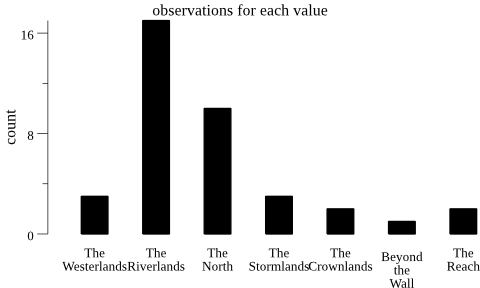

In [35]:
display.PNG(graph)

## Is there any relationship between troop size and battle outcome?

### Create a ggplot scatter plot of attacker_size against defender_size (if not NaN), 
### with the color of each dot being determined by the outcome of the battle

In [36]:
fmt.Println(t)

[[name Battle of the Golden Tooth Battle at the Mummer's Ford Battle of Riverrun Battle of the Green Fork Battle of the Whispering Wood Battle of the Camps Sack of Darry Battle of Moat Cailin Battle of Deepwood Motte Battle of the Stony Shore Battle of Torrhen's Square Battle of Winterfell Sack of Torrhen's Square Sack of Winterfell Battle of Oxcross Siege of Storm's End Battle of the Fords Sack of Harrenhal Battle of the Crag Battle of the Blackwater Siege of Darry Battle of Duskendale Battle of the Burning Septry Battle of the Ruby Ford Retaking of Harrenhal The Red Wedding Siege of Seagard Battle of Castle Black Fall of Moat Cailin Sack of Saltpans Retaking of Deepwood Motte Battle of the Shield Islands Invasion of Ryamsport, Vinetown, and Starfish Harbor Second Seige of Storm's End Siege of Dragonstone Siege of Riverrun Siege of Raventree Siege of Winterfell] [year 298 298 298 298 298 298 298 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 300 300 30

8419 <nil>

In [37]:
attackerSize := t[15][1:]

In [38]:
deffenderSize := t[16][1:]

In [39]:
fmt.Println(attackerSize)

[15000  15000 18000 1875 6000   1000 264 244 20  618 6000 5000 20000 100 6000 21000  3000    3500  100000   4500    2000 3000 1500 5000]


137 <nil>

In [40]:
fmt.Println(deffenderSize)

[4000 120 10000 20000 6000 12625     900   2000 10000 20000 10000 100  7250    6000  3500  1240   200   200    8000]


117 <nil>

In [41]:
attackerOutcome :=t[11][1:]

In [42]:
fmt.Println(attackerOutcome)

[win win win loss win win win win win win win win win win win win loss win win loss win loss win win win win win loss win win win win win win win win win ]


156 <nil>

In [43]:
var attackerWins [2][]string
var attackerLose [2][]string
attackerWins[0] = make([]string, len(attackerOutcome))
attackerWins[1] = make([]string, len(attackerOutcome))
attackerLose[0] = make([]string, len(attackerOutcome))
attackerLose[1] = make([]string, len(attackerOutcome))
atwins :=0
atLose := 0
for i,val := range attackerOutcome {
    if val=="win"{
        attackerWins[0][atwins]=attackerSize[i]
        attackerWins[1][atwins]=deffenderSize[i]
        atwins++
    }else{
        attackerLose[0][atLose]=attackerSize[i]
        attackerLose[1][atLose]=deffenderSize[i]
        atLose++
    }
}

In [44]:
troopvsoutcome, err := plot.New()

In [45]:
troopvsoutcome.Title.Text = "relationship between troop size and battle outcome"
	troopvsoutcome.Y.Label.Text = "attacker size"
	troopvsoutcome.X.Label.Text = "defffender size"

In [46]:
troopvsoutcome.Add(plotter.NewGrid())

In [47]:
import "strconv"
import "image/color"

In [48]:
func attackerVsDeffenderSize(ndeffender []string, natacker []string) plotter.XYs {
    pts := make(plotter.XYs, len(ndeffender))
	for i := range pts {
        if ndeffender[i] == ""{
            ndeffender[i]="0"
        }
        if natacker[i] == ""{
            natacker[i]="0"
        }
        pts[i].X = strconv.ParseFloat(ndeffender[i], 64)
        pts[i].Y = strconv.ParseFloat(natacker[i], 64)
	}
	return pts
}

// warning: expression returns 2 values, using only the first one: [float64 error]
// warning: expression returns 2 values, using only the first one: [float64 error]


In [49]:
s, err := plotter.NewScatter(attackerVsDeffenderSize(attackerWins[1],attackerWins[0]))
fmt.Println(err)
	s.GlyphStyle.Color = color.RGBA{R: 255, B: 128, A: 255}

<nil>


In [50]:
s1, err := plotter.NewScatter(attackerVsDeffenderSize(attackerLose[1],attackerLose[0]))
fmt.Println(err)
	s1.GlyphStyle.Color = color.RGBA{R: 0, B: 128, A: 255}

<nil>


In [51]:
troopvsoutcome.Add(s,s1)

In [52]:
if err := troopvsoutcome.Save(4*vg.Inch, 4*vg.Inch, "points.png"); err != nil {
		panic(err)
	}

In [53]:
graph1:=getGraph("points.png")

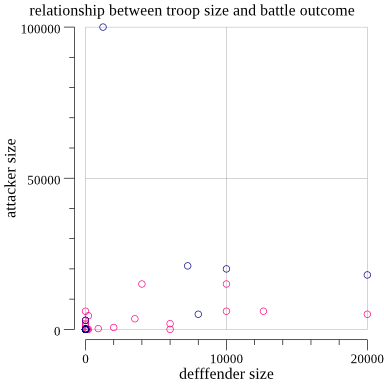

In [54]:
display.PNG(graph1)